In [1]:
pip install pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Steganography Project - Hiding Information in Image (LSB Method)

from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
# Convert message to binary
def text_to_binary(message):
    return ''.join([format(ord(char), '08b') for char in message])

In [4]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)} #char to ascii
c={i:chr(i) for i in range(255)} #ascii to char

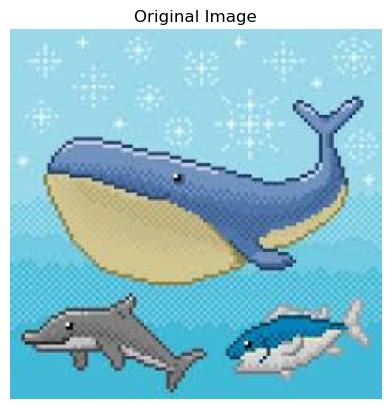

Image shape (Height, Width, Channels): (224, 225, 3)


In [5]:
#LOAD THE IMAGE(change path to your image)
image_path=r"C:\Users\ayush\OneDrive\Desktop\steganography-hiding a informtion in the image\download.jpeg"
x=cv2.imread(image_path)

#Convert to RGB for matpotlib visualization
x_rgb= cv2.cvtColor(x,cv2.COLOR_BGR2RGB)

#Show the original image
plt.imshow(x_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()         

#Display image shape
print("Image shape (Height, Width, Channels):", x.shape)


In [6]:
# Convert binary to text
def binary_to_text(binary_str):
    chars = [binary_str[i:i+8] for i in range(0, len(binary_str), 8)]
    return ''.join([chr(int(char, 2)) for char in chars])


In [7]:
# Encode the message into image
def encode_image(image_path, message, output_path):
    image = Image.open(image_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    binary_message = text_to_binary(message) + '1111111111111110'  # Delimiter
    data_index = 0
    new_pixels = []

    for pixel in list(image.getdata()):
        r, g, b = pixel
        new_rgb = []

        for color in (r, g, b):
            if data_index < len(binary_message):
                lsb = binary_message[data_index]
                new_color = (color & ~1) | int(lsb)
                new_rgb.append(new_color)
                data_index += 1
            else:
                new_rgb.append(color)

        new_pixels.append(tuple(new_rgb))

    if data_index < len(binary_message):
        raise ValueError("Message is too long to encode in this image.")

    image.putdata(new_pixels)
    image.save(output_path)
    print(" Message encoded and saved to", output_path)

In [8]:
# Decode the hidden message from image
def decode_image(image_path):
    image = Image.open(image_path)
    binary_data = ''
    for pixel in list(image.getdata()):
        for color in pixel[:3]:
            binary_data += str(color & 1)
              # Split binary data by 8 bits
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    
    # Stop at delimiter
    message = ''
    for byte in all_bytes:
        if byte == '11111110':  # Delimiter
            break
        message += chr(int(byte, 2))
    return message

In [9]:
# --- Test the Steganography ---
# Step 1: Encode
input_image = "download.jpeg"      # Use your image here
output_image = "encoded.png"
secret_message = "I am AYUSH KUMAR DEWANGAN "

encode_image(input_image, secret_message, output_image)



 Message encoded and saved to encoded.png


In [10]:
#encrypt using pixel modelfication
x_enc=x.copy()
key="123"  
n=0 #no. of rows
m=0 #no. of columns
z=0 #colour panel
l=len(secret_message)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[secret_message[i]]^d[key[kl]]
    x_enc[n,m,z]=new_val
    print(f"Embedding '{secret_message[i]}'  (ASCII {d[secret_message[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) ={new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    z=(z+1)%3
    m=(m+1)%3
    kl=(kl+1)%len(key)

Embedding 'I'  (ASCII 73) XOR '1' (ASCII 49) =120 at pixel (0,0,0) [original=234]
Embedding ' '  (ASCII 32) XOR '2' (ASCII 50) =18 at pixel (1,2,1) [original=216]
Embedding 'a'  (ASCII 97) XOR '3' (ASCII 51) =82 at pixel (2,1,2) [original=155]
Embedding 'm'  (ASCII 109) XOR '1' (ASCII 49) =92 at pixel (3,0,0) [original=234]
Embedding ' '  (ASCII 32) XOR '2' (ASCII 50) =18 at pixel (4,2,1) [original=216]
Embedding 'A'  (ASCII 65) XOR '3' (ASCII 51) =114 at pixel (5,1,2) [original=155]
Embedding 'Y'  (ASCII 89) XOR '1' (ASCII 49) =104 at pixel (6,0,0) [original=234]
Embedding 'U'  (ASCII 85) XOR '2' (ASCII 50) =103 at pixel (7,2,1) [original=216]
Embedding 'S'  (ASCII 83) XOR '3' (ASCII 51) =96 at pixel (8,1,2) [original=155]
Embedding 'H'  (ASCII 72) XOR '1' (ASCII 49) =121 at pixel (9,0,0) [original=234]
Embedding ' '  (ASCII 32) XOR '2' (ASCII 50) =18 at pixel (10,2,1) [original=216]
Embedding 'K'  (ASCII 75) XOR '3' (ASCII 51) =120 at pixel (11,1,2) [original=155]
Embedding 'U'  (ASC

In [17]:
#Save encrypted Image
x_enc=x.copy()
x_enc = cv2.imread("encoded.jpg")


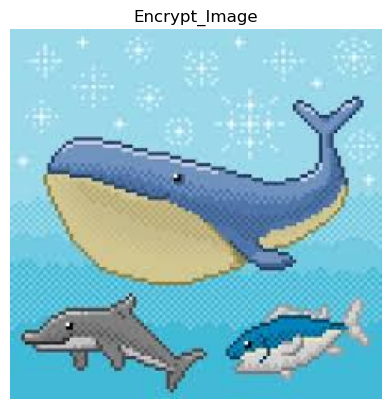

In [18]:
#Show Encrypted image
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()         

In [19]:
# --- Test the Steganography ---
# Step 2: Decode
decoded_message = decode_image(output_image)
print(" Decoded message:", decoded_message)

 Decoded message: I am AYUSH KUMAR DEWANGAN ÿ


In [26]:
# Decrypt
n, m, z = 0, 0, 0
kl = 0
decrypt = ""

for i in range(l):
    val = x_enc[n, m, z]
    orig_char = c[val ^ d[key[kl]]]
    decrypt += orig_char
    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")

    # Update indices
    z = (z + 1) % 3
    if z == 0:
        m += 1
        if m == x_enc.shape[1]:  # check width
            m = 0
            n += 1
    kl = (kl + 1) % len(key)

print("Decrypted Text:", decrypt)


Decrypting pixel (0,0,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,0,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,0,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,1,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,1,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,1,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,2,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,2,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,2,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,3,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,3,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,3,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,4,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,4,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,4,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,5,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,5,1): 216 XOR 50 = 234 -> 'ê'
Decrypting pixel (0,5,2): 155 XOR 51 = 168 -> '¨'
Decrypting pixel (0,6,0): 234 XOR 49 = 219 -> 'Û'
Decrypting pixel (0,6,1): 216 XOR 50 = 234 -> 'ê'
